In [64]:
import pandas as pd

d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],
      'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]}

df = pd.DataFrame(data=d)
df

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no
...,...,...
96,67,yes
97,74,yes
98,79,yes
99,90,yes


In [65]:
from sklearn.preprocessing import OrdinalEncoder

finished_race = ['no', 'yes']
enc = OrdinalEncoder(categories=[finished_race])
print(df['completed_50m_ultra'].unique())

['no' 'yes']


In [66]:
df['completed_50m_ultra'] = enc.fit_transform(df[['completed_50m_ultra']])
df

,miles_per_week,completed_50m_ultra
0,37,0.0
1,39,0.0
2,46,0.0
3,51,0.0
4,88,0.0
...,...,...
96,67,1.0
97,74,1.0
98,79,1.0
99,90,1.0


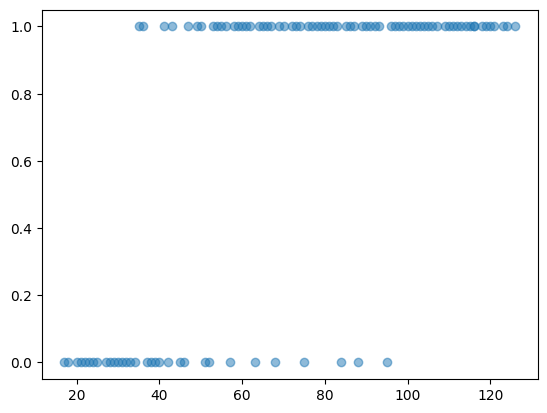

In [67]:
from matplotlib import pyplot as plt

plt.scatter(df.miles_per_week, df.completed_50m_ultra, alpha=0.5)

<Axes: xlabel='completed_50m_ultra', ylabel='count'>

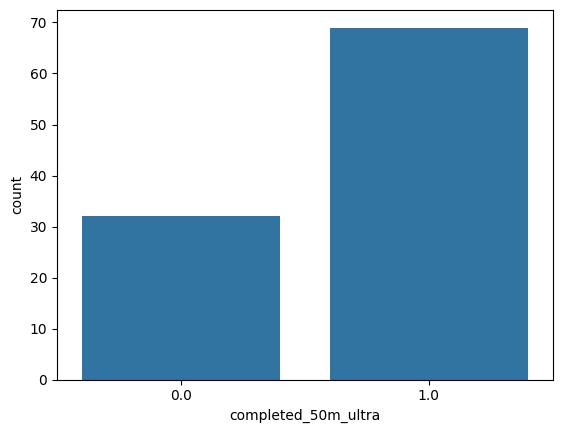

In [68]:
import seaborn as sns

sns.countplot(x='completed_50m_ultra', data=df)

In [69]:
X = df.iloc[:, 0:1]
y = df.iloc[:, 1]

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=15)
X_train.shape

(80, 1)

In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9047619047619048

In [73]:
coefficients = model.coef_[0]
coefficients

array([0.07620469])

In [74]:
import numpy as np
np.exp(coefficients)

array([1.07918345])

In [75]:
from sklearn.metrics import confusion_matrix

print (confusion_matrix(y_test, y_pred))

[[ 5  2]
 [ 0 14]]


In [76]:
from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83         7
         1.0       0.88      1.00      0.93        14

    accuracy                           0.90        21
   macro avg       0.94      0.86      0.88        21
weighted avg       0.92      0.90      0.90        21

